# Architecture of CNN

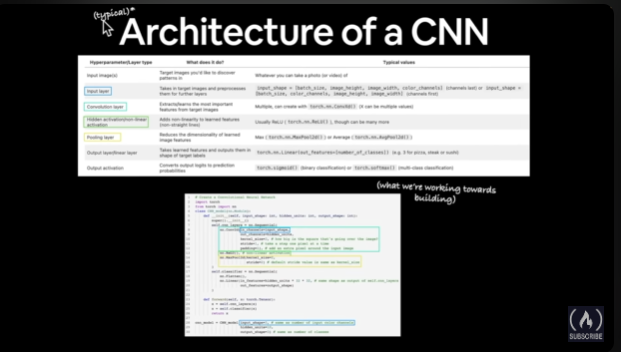


# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` - functions for manipulating you vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions:
print(f'torch ver:{torch.__version__},\ntorchvision ver:{torchvision.__version__}')

torch ver:2.1.0+cu118,
torchvision ver:0.16.0+cu118


## 1. Getting a dataset

The dataset we'll use is: FashionMNIST
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', # where to download data to
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image:
print(f'''image shape: {image.shape}, \n
image label number: {label} \n
image label: {class_names[label]}''')

image shape: torch.Size([1, 28, 28]), 

image label number: 9 

image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


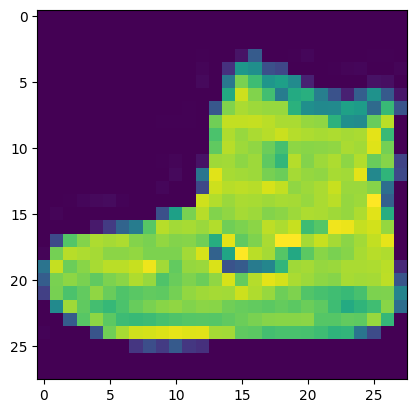

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
# plt.imshow(image) # you will get error because our shape doesn't match with matplotlib's image expectation.
plt.imshow(image.squeeze()) # so you squeeze the image, by removing a single one dimension.

(-0.5, 27.5, 27.5, -0.5)

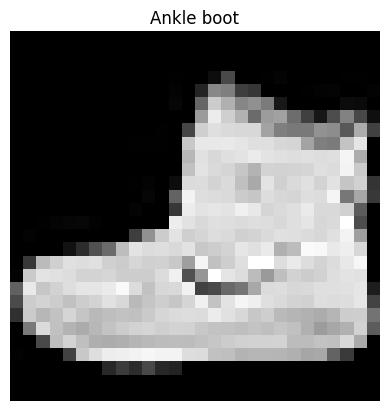

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


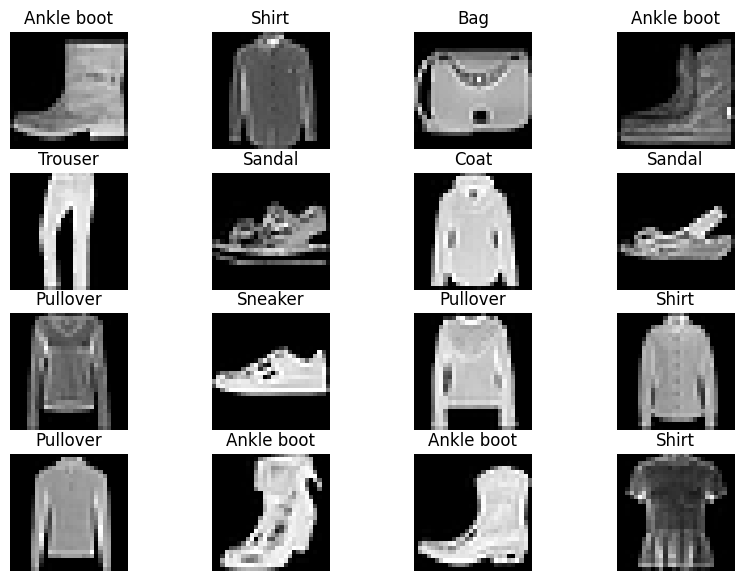

In [ ]:
# Plot more images
torch.manual_seed(42)
torch.cuda.manual_seed(42)
fig = plt.figure(figsize=(10,7))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader:

Right now, our data is in the form of Pytorch Datasets.

DataLoader turns our datasets into a Python iterable.

More specifically, we want to turn our data into batches or mini-batches.

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time. (batch size of 32)
2. It gives our neural network more chances to update it's gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd8503c48e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd8503c6bc0>)

In [ ]:
# So, what was created under the hood?
print(f'''Dataloaders: {train_dataloader, test_dataloader}\n
Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}\n
Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}''')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fd8503c48e0>, <torch.utils.data.dataloader.DataLoader object at 0x7fd8503c6bc0>)

Length of train dataloader: 1875 batches of 32

Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


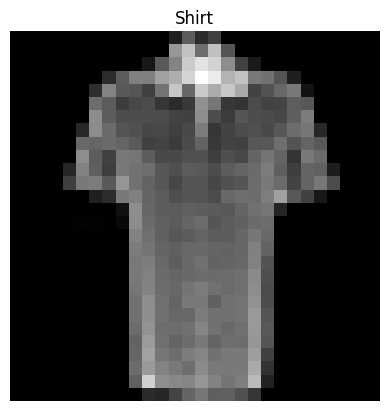

In [ ]:
# Show a sample
torch.manual_seed(42)
torch.cuda.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words, start simply and add complexity when necessary

In [ ]:
# Create a flatten layer
from torch import nn
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f'shape before flattening: {x.shape} -> [color_channels, height, width]')

# Flatten the sample:
output = flatten_model(x) # perform the forward pass
print(f'shape after flattening: {output.shape} -> [color_channels, height*width]')


shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0  = FashionMNISTModelV0(
    input_shape = 784, # 28*28 i.e. output of flatten
    hidden_units = 10,
    output_shape = len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
print(model_0(dummy_x), '\n', model_0(dummy_x).shape)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>) 
 torch.Size([1, 10])


In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi class data our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation Metric - since we are working on a classification problem, let's use accuracy on our evaluation metric.
(Accuracy is a classification evaluation metric.Others are precision, recall, f1-score, confusion matrix, classification report etc.)
You could use torchmetrics for evaluation.
But we will use our own function here.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo:
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download...')
else:
  print('Downloading helper functions...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  print('Downloaded helper functions. Saving helper functions...')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
  print('saved helper_functions.py')


helper_functions.py already exists, skipping download...


In [ ]:
# import accuracy metric from helper function
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments:

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Print difference between start and end time."""
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


4.5635999867954524e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch} \n----')
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred=model_0(X)

    # 2. Calculate loss (per batch):
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate training loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step:
    optimizer.step()
    '''The optimizer will optimize our model's parameters once per batch
    rather than once per epoch'''

    # print out whats happening:
    if batch%400 == 0:
       print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train dataloader:
  train_loss /= len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. Forward Pass:
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out whats happenting:
  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test Acc: {test_acc: .4f}')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5904 | Test loss: 0.5095 | Test Acc:  82.0387
Epoch: 1 
----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4763 | Test loss: 0.4799 | Test Acc:  83.1969
Epoch: 2 
----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4550 | Test loss: 0.4766 | Test Acc:  83.4265
Train time on cpu: 31.103 seconds


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, # only works when model was created with a class
          'model_loss': loss.item(),
          'model_acc': acc}

# Calculate model 0 results on test datasets
model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn= accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a GPU if there is one)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
!nvidia-smi

Thu Nov 23 15:49:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    29W /  70W |    879MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook-02.

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
!nvidia-smi

Thu Nov 23 15:49:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    29W /  70W |    879MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Setup loss, optimizer, evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training step with model trying to learn on data_loader"""
  train_loss, train_acc = 0,0
  # put model into training mode:
  model.train()
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):

    # Put data on target device:
    X, y = X.to(device), y.to(device)

    # 1. Forward pass outputs logits
    y_pred=model(X)

    # 2. Calculate loss (per batch):
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate training loss
    train_acc +=  accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step:
    optimizer.step()
    '''The optimizer will optimize our model's parameters once per batch
    rather than once per epoch'''

    # print out whats happening:
    if batch%400 == 0:
       print(f'Looked at {batch * len(X)} / {len(data_loader.dataset)} samples')

  # Divide total train loss and acc by length of train dataloader:
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss: .5f} | Train acc: {train_acc: .2f}%')


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0,0
  # Put the model in eval mode
  model.eval()
  model.to(device)
  # Turn on context manager with inference mode:
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to the target device:
      X, y = X.to(device), y.to(device)

      # 1. Forward pass outputs logits:
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss: .5f} | Test acc: {test_acc:.2f}% \n")


In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss:  1.09199 | Train acc:  61.34%
Test loss:  0.95636 | Test acc: 65.00% 

Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss:  0.78101 | Train acc:  71.93%
Test loss:  0.72227 | Test acc: 73.91% 

Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss:  0.67027 | Train acc:  75.94%
Test loss:  0.68500 | Test acc: 75.02% 

Train time on cuda: 30.290 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic:
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, # only works when model was created with a class
          'model_loss': loss.item(),
          'model_acc': acc}

>** Note: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU

> Why is this?

> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU
> 2. The hardware you're using has a better CPU in terms compute capability of GPU

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

#### Our second model didn't beat our first model's baseline

## Model 2: Building a Convolutional Neural Network (CNN)

CNNs are also known as ConvNets.
CNNs are known for their capabilities to find patterns in visual data.

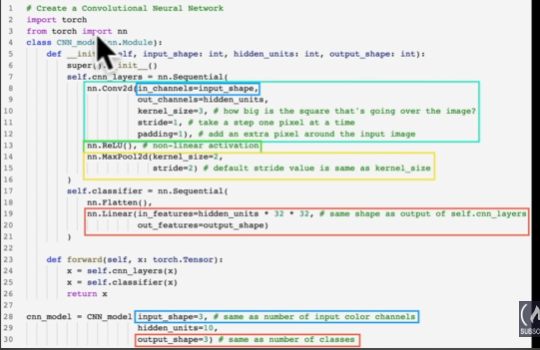

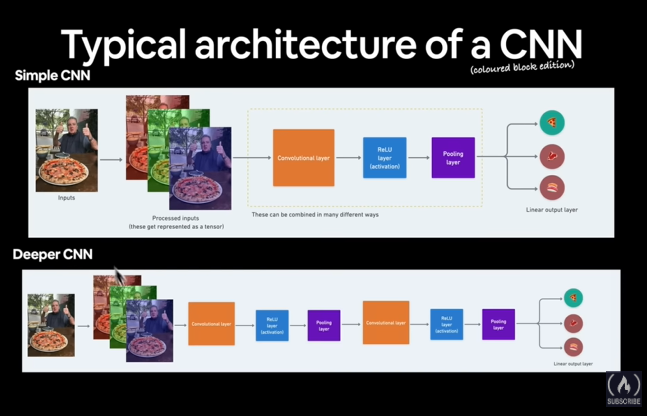

### Find out what's happening in a CNN:

https://poloclub.github.io/cnn-explainer/

In [91]:
# Create a convolutional neural network:
class FashionMNISTModelV2(nn.Module):
  '''
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  '''
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding = 1), # values we can set ourselves in our NNs are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2))
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2,2)))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features=output_shape)
    )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      x = self.conv_block_1(x)
      print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape)
      x = self.classifier(x)
      return x

In [92]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
